Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [ ]:
# Write your code for AIM #1 
import numpy as np
import pandas as pd
import time

# AIM 1: Generate a very large dataset

# Step 1: Generate dataset using pandas
start_time_pandas = time.time()
pandas_data = pd.DataFrame(np.random.randint(1, 100, 1000000), columns=['Random Numbers'])
end_time_pandas = time.time()
pandas_time_taken = end_time_pandas - start_time_pandas
print(f"Pandas Time Taken: {pandas_time_taken:.6f} seconds")

# Step 2: Generate dataset using NumPy
start_time_numpy = time.time()
numpy_data = np.random.randint(1, 100, 1000000)
end_time_numpy = time.time()
numpy_time_taken = end_time_numpy - start_time_numpy
print(f"NumPy Time Taken: {numpy_time_taken:.6f} seconds")

# Step 3: Compare time
if numpy_time_taken < pandas_time_taken:
    print("NumPy is faster.")
else:
    print("Pandas is faster.")


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [18]:
import pandas as pd
import numpy as np
import time

# Load the dataset
df = pd.read_csv(r'C:/Users/Q/Desktop/github/NGEX6/sleep_health.csv')

# Print the columns to check their names
print("Columns in the DataFrame:")
print(df.columns)

# 1. Calculate mean using Pandas
mean_values_pandas = df[['Sleep Duration', 'Systolic Blood Pressure', 
                          'Diastolic Blood Pressure', 'Heart Rate', 
                          'Daily Steps']].mean()
print("\nMean Values (Pandas):")
print(mean_values_pandas)

# 2. Calculate mean using NumPy
mean_values_numpy = np.mean(df[['Sleep Duration', 'Systolic Blood Pressure', 
                                  'Diastolic Blood Pressure', 'Heart Rate', 
                                  'Daily Steps']].to_numpy(), axis=0)
print("\nMean Values (NumPy):")
print(mean_values_numpy)

# 3. Correlation using Pandas
correlation_matrix_pandas = df.corr()
correlation_sleep_age = df['Sleep Duration'].corr(df['Age'])
correlation_sleep_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
correlation_sleep_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])

correlation_results_pandas = {
    "Sleep & Age": correlation_sleep_age,
    "Sleep & Heart Rate": correlation_sleep_heart_rate,
    "Sleep & Daily Steps": correlation_sleep_daily_steps
}
print("\nCorrelation Results (Pandas):")
print(correlation_results_pandas)

# 4. Correlation using NumPy
numerical_data = df[['Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps']].to_numpy()
correlation_matrix_numpy = np.corrcoef(numerical_data, rowvar=False)

correlation_sleep_age_numpy = correlation_matrix_numpy[0, 1]  # Sleep Duration with Age
correlation_sleep_heart_rate_numpy = correlation_matrix_numpy[0, 2]  # Sleep Duration with Heart Rate
correlation_sleep_daily_steps_numpy = correlation_matrix_numpy[0, 3]  # Sleep Duration with Daily Steps

correlation_results_numpy = {
    "Sleep & Age": correlation_sleep_age_numpy,
    "Sleep & Heart Rate": correlation_sleep_heart_rate_numpy,
    "Sleep & Daily Steps": correlation_sleep_daily_steps_numpy
}
print("\nCorrelation Results (NumPy):")
print(correlation_results_numpy)

# 5. Standard deviation using Pandas
std_sleep_duration_pandas = df['Sleep Duration'].std()
print("\nStandard Deviation of Sleep Duration (Pandas):")
print(std_sleep_duration_pandas)

# 6. Standard deviation using NumPy
std_sleep_duration_numpy = np.std(df['Sleep Duration'].to_numpy(), ddof=1)  # ddof=1 for sample std
print("\nStandard Deviation of Sleep Duration (NumPy):")
print(std_sleep_duration_numpy)

# 7. Calculate time difference between using Pandas and NumPy
# Timing Pandas
start_time_pandas = time.time()

# Load the dataset and perform calculations again
df = pd.read_csv(r'C:/Users/Q/Desktop/github/NGEX6/sleep_health.csv')
mean_values_pandas = df[['Sleep Duration', 'Systolic Blood Pressure', 
                          'Diastolic Blood Pressure', 'Heart Rate', 
                          'Daily Steps']].mean()
correlation_sleep_age = df['Sleep Duration'].corr(df['Age'])
correlation_sleep_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
correlation_sleep_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])
std_sleep_duration_pandas = df['Sleep Duration'].std()

end_time_pandas = time.time()
time_pandas = end_time_pandas - start_time_pandas

# Timing NumPy
start_time_numpy = time.time()

# Load the dataset and perform calculations using NumPy
data_numpy = np.loadtxt(r'C:/Users/Q/Desktop/github/NGEX6/sleep_health.csv', delimiter=',', skiprows=1)
mean_values_numpy = np.mean(data_numpy[:, [0, 1, 2, 3, 4]], axis=0)
correlation_matrix_numpy = np.corrcoef(data_numpy[:, [0, 5, 3, 4]], rowvar=False)
correlation_sleep_age_numpy = correlation_matrix_numpy[0, 1]
correlation_sleep_heart_rate_numpy = correlation_matrix_numpy[0, 2]
correlation_sleep_daily_steps_numpy = correlation_matrix_numpy[0, 3]
std_sleep_duration_numpy = np.std(data_numpy[:, 0], ddof=1)

end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy

# Time comparison
time_comparison = {
    "Pandas Time": time_pandas,
    "NumPy Time": time_numpy
}
print("\nTime Comparison:")
print(time_comparison)

# Determine which is faster
if time_pandas < time_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Columns in the DataFrame:
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')


KeyError: "['Systolic Blood Pressure', 'Diastolic Blood Pressure'] not in index"

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

Columns in the DataFrame:
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')


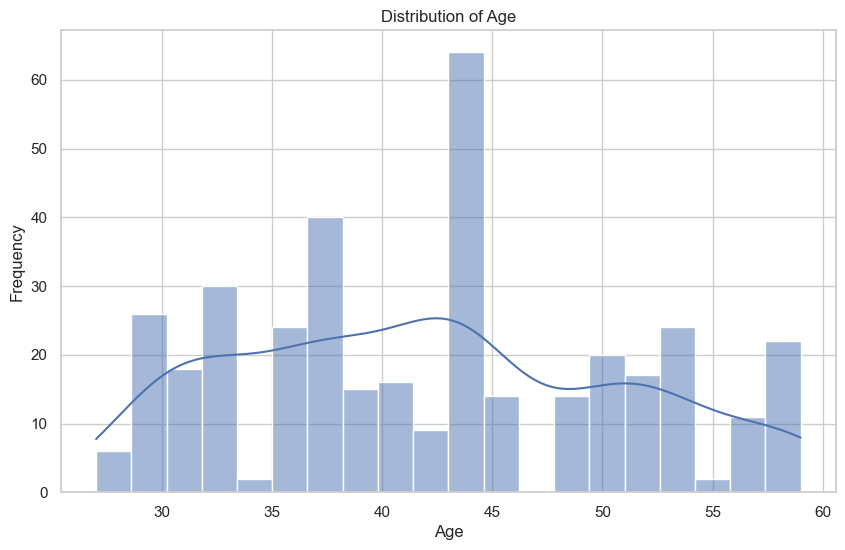

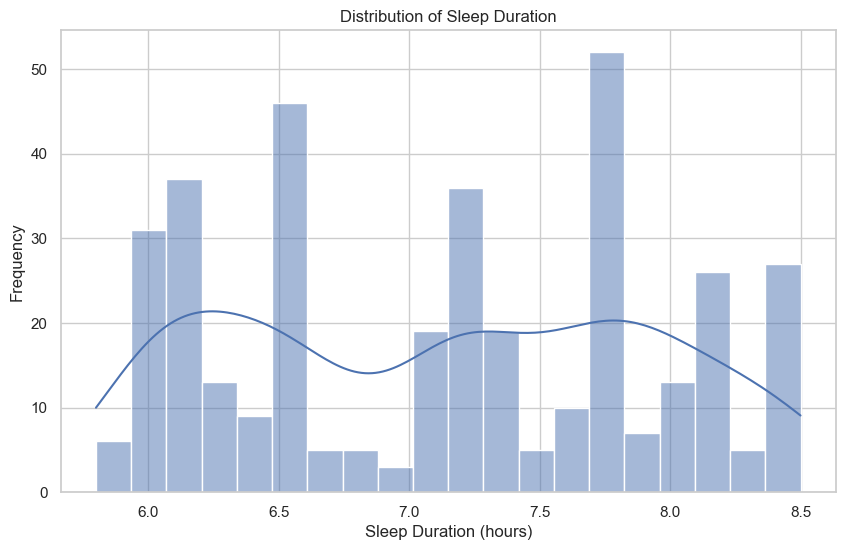

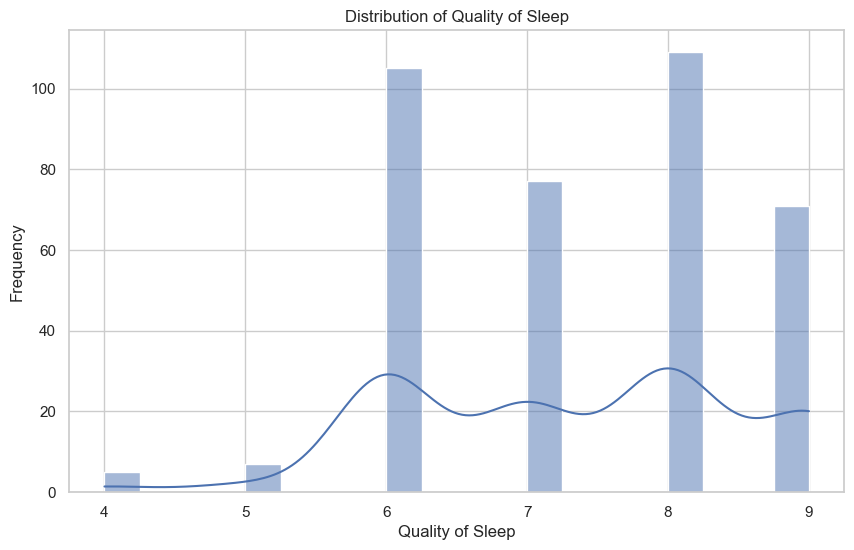

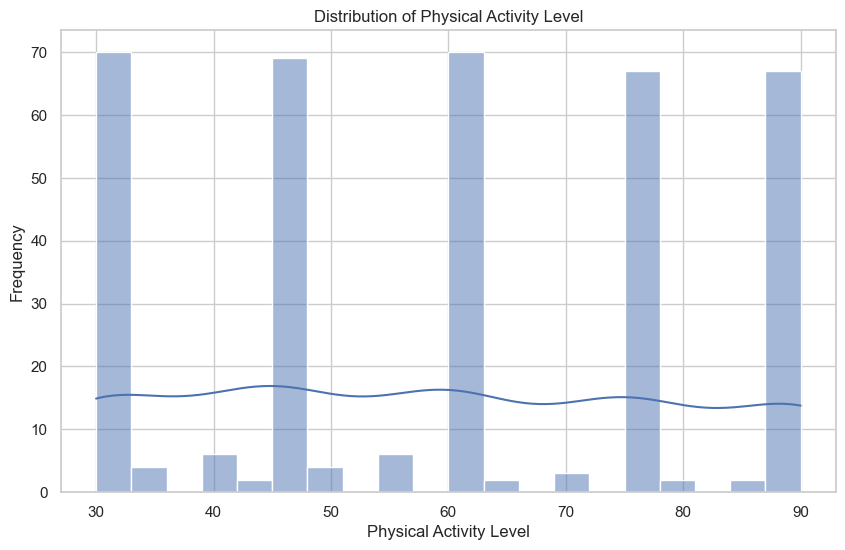

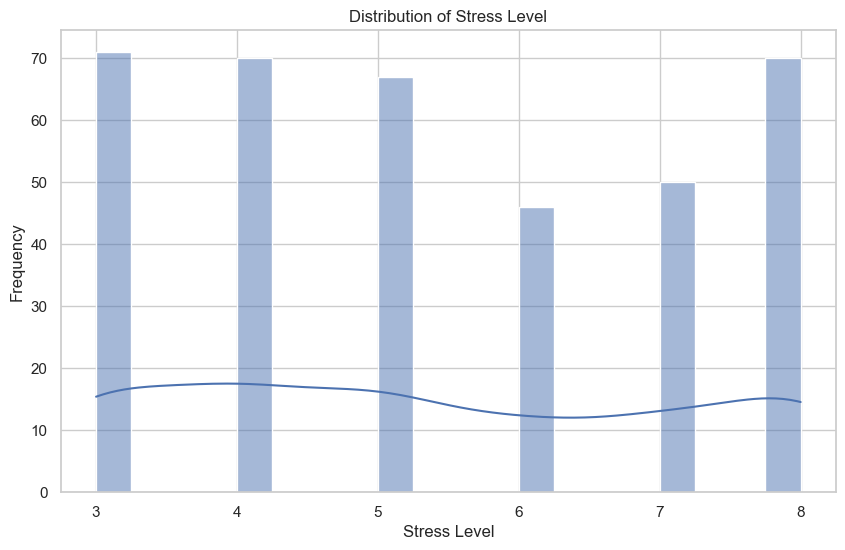

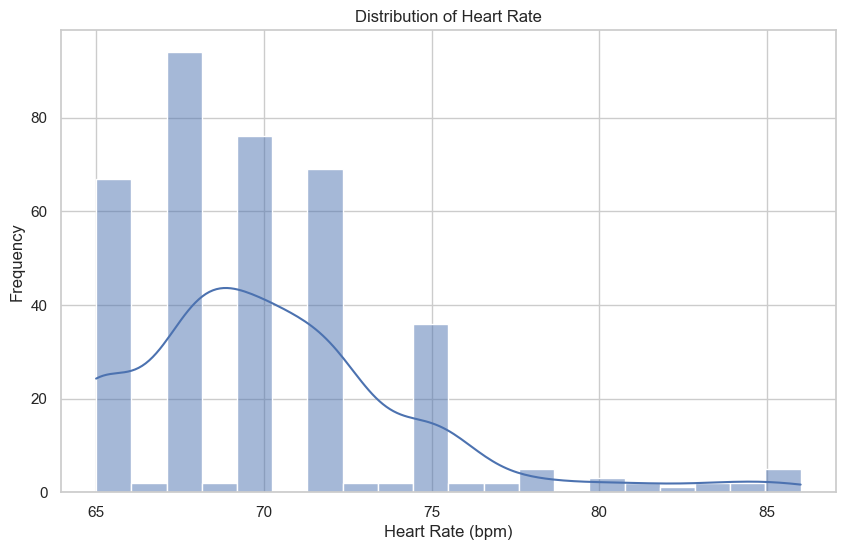

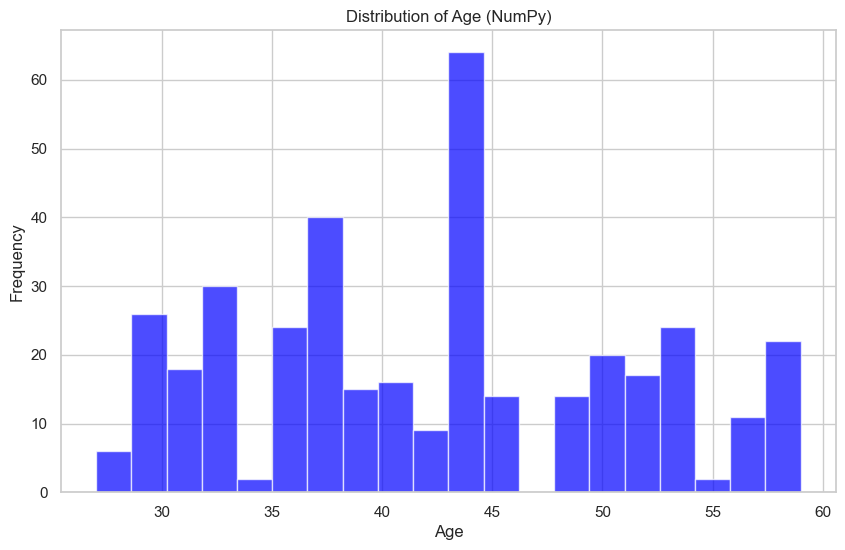

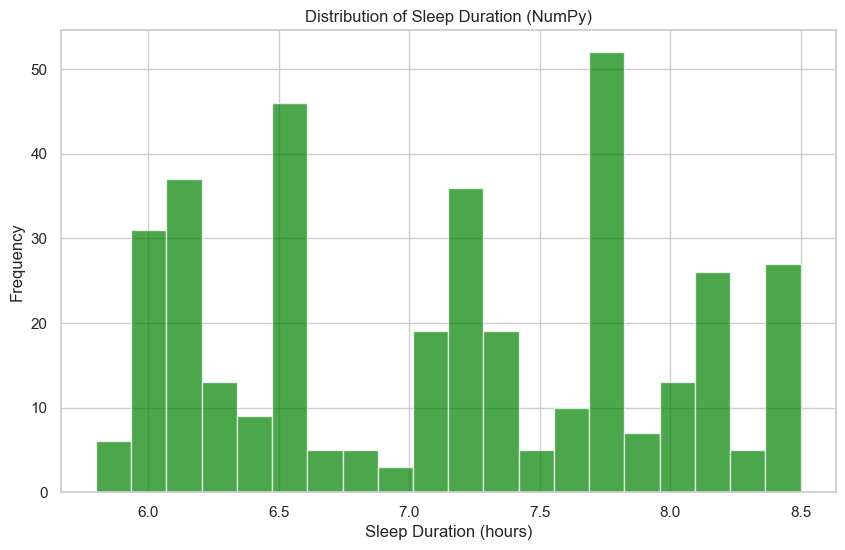

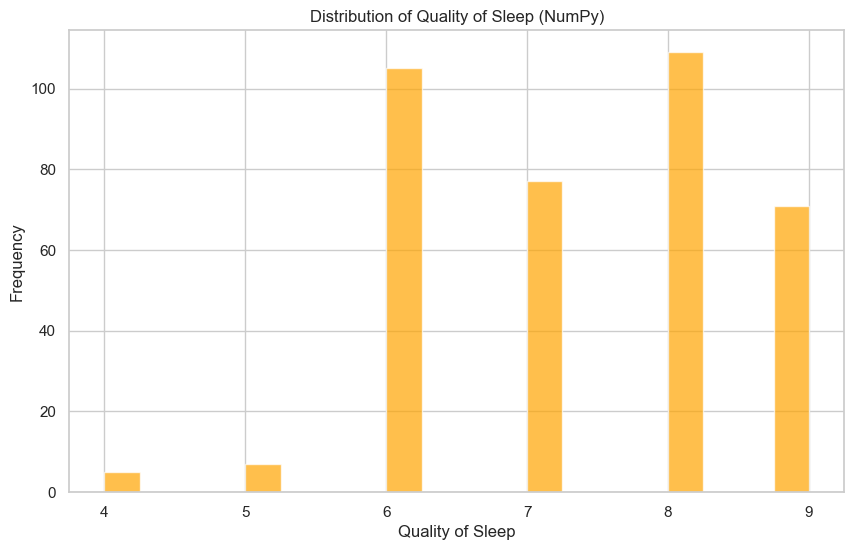

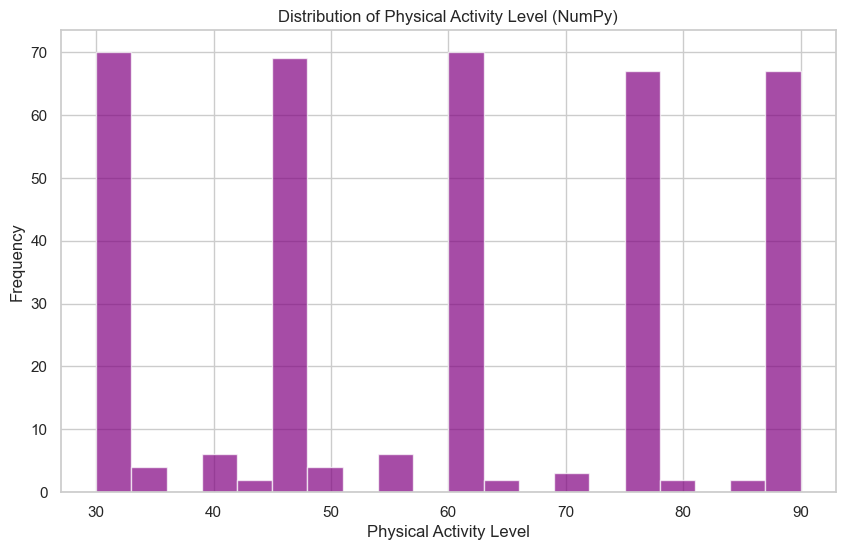

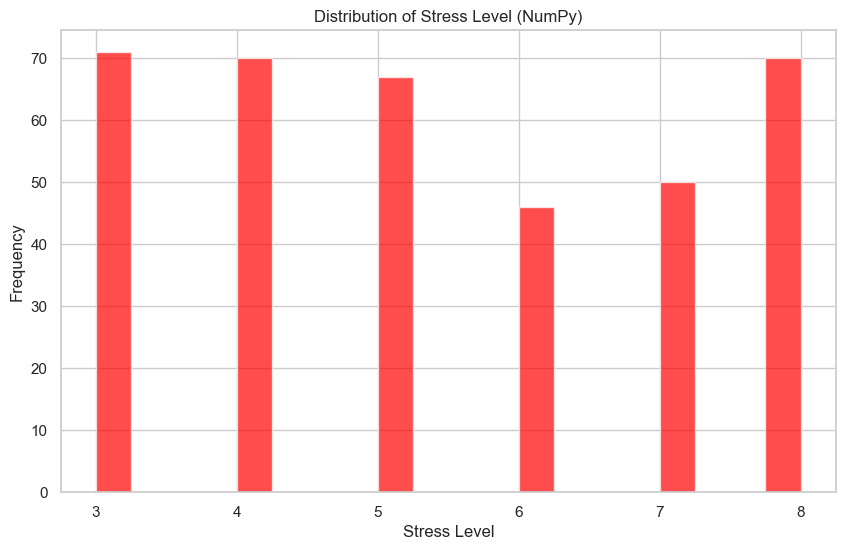

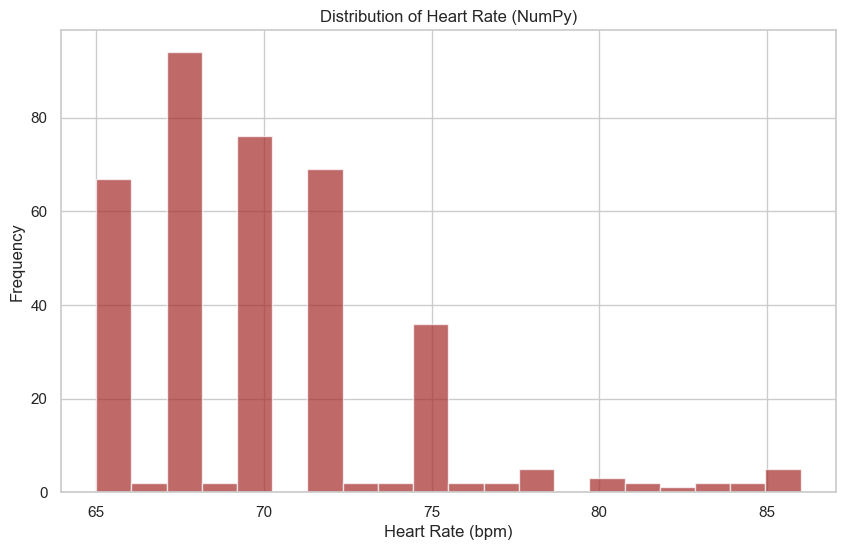

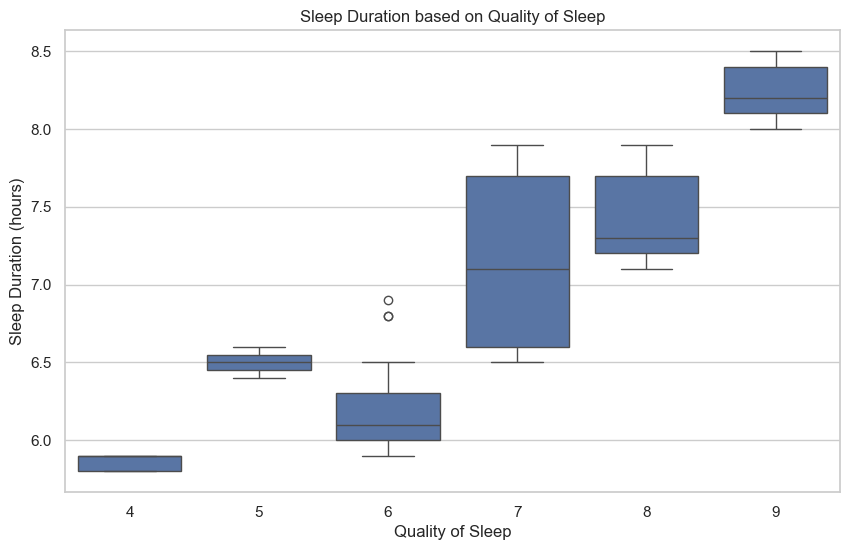

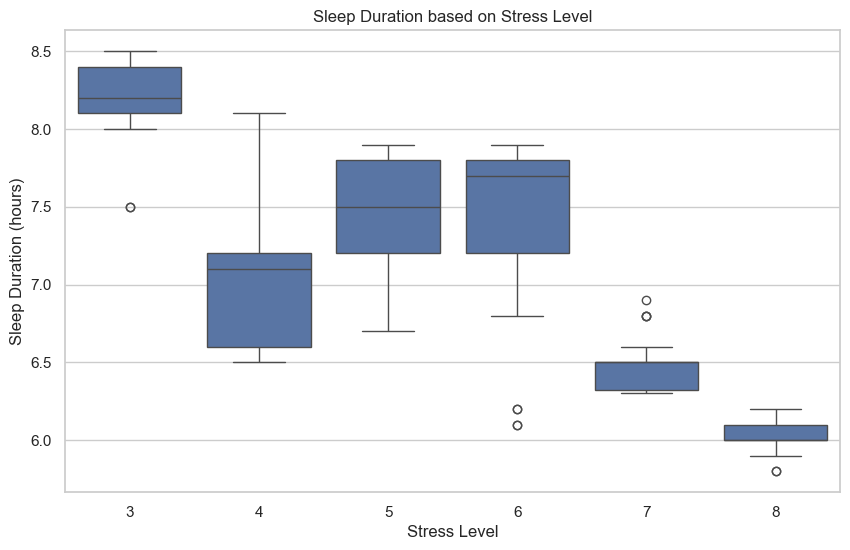

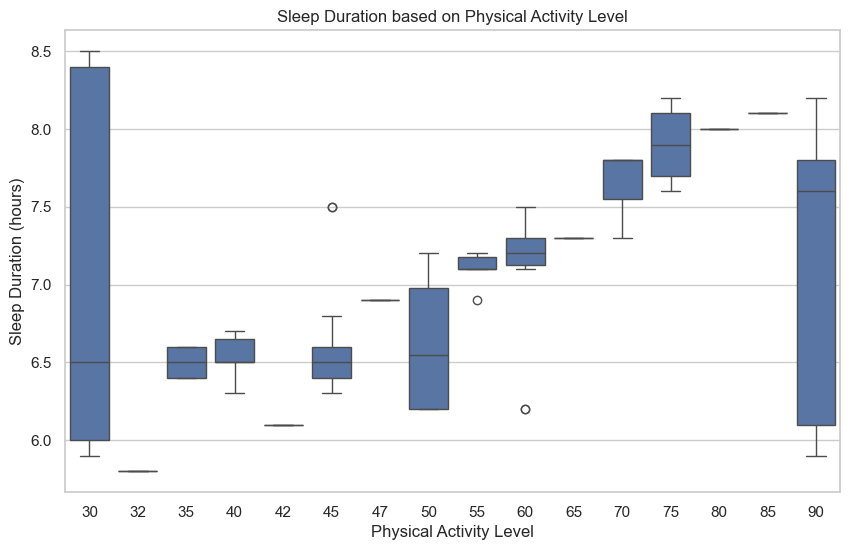

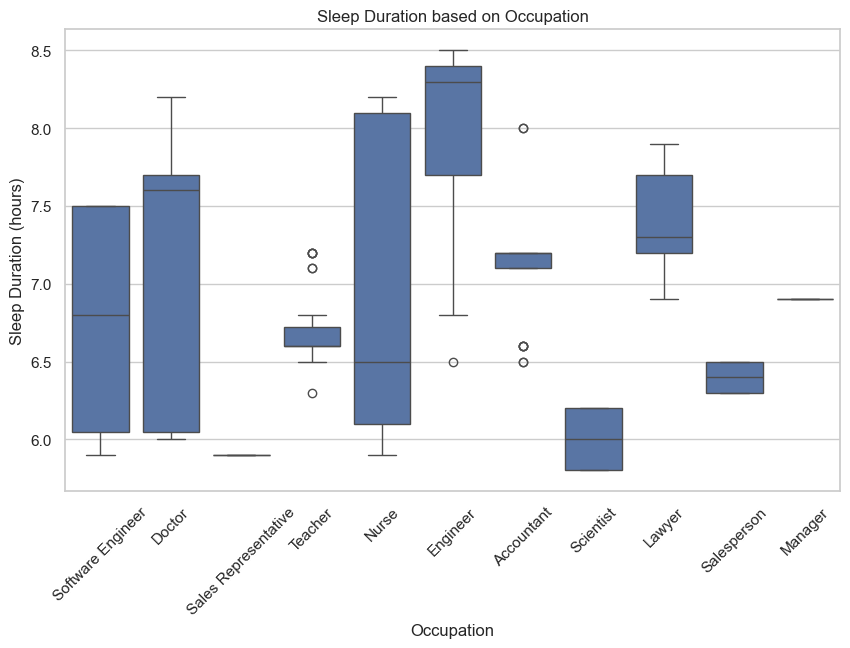

ValueError: Could not interpret value `BMI` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load the dataset
df = pd.read_csv(r'C:/Users/Q/Desktop/github/NGEX6/sleep_health.csv')

# Check the columns of the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Using only pandas, plot the distribution
# 1.1 Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2 Sleep Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], bins=20, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 1.3 Quality of Sleep
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], bins=20, kde=True)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# 1.4 Physical Activity Level
plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], bins=20, kde=True)
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

# 1.5 Stress Level
plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], bins=20, kde=True)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 1.6 Heart Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], bins=20, kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

# 2. Using only NumPy, do the same as Step 1
data_numpy = df.to_numpy()

# 2.1 Age
plt.figure(figsize=(10, 6))
plt.hist(data_numpy[:, df.columns.get_loc('Age')], bins=20, alpha=0.7, color='blue')
plt.title('Distribution of Age (NumPy)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2 Sleep Duration
plt.figure(figsize=(10, 6))
plt.hist(data_numpy[:, df.columns.get_loc('Sleep Duration')], bins=20, alpha=0.7, color='green')
plt.title('Distribution of Sleep Duration (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 2.3 Quality of Sleep
plt.figure(figsize=(10, 6))
plt.hist(data_numpy[:, df.columns.get_loc('Quality of Sleep')], bins=20, alpha=0.7, color='orange')
plt.title('Distribution of Quality of Sleep (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# 2.4 Physical Activity Level
plt.figure(figsize=(10, 6))
plt.hist(data_numpy[:, df.columns.get_loc('Physical Activity Level')], bins=20, alpha=0.7, color='purple')
plt.title('Distribution of Physical Activity Level (NumPy)')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

# 2.5 Stress Level
plt.figure(figsize=(10, 6))
plt.hist(data_numpy[:, df.columns.get_loc('Stress Level')], bins=20, alpha=0.7, color='red')
plt.title('Distribution of Stress Level (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 2.6 Heart Rate
plt.figure(figsize=(10, 6))
plt.hist(data_numpy[:, df.columns.get_loc('Heart Rate')], bins=20, alpha=0.7, color='brown')
plt.title('Distribution of Heart Rate (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

# 3. Using only pandas, plot distributions based on different factors
# 3.1 Sleep Duration based on Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 Sleep Duration based on Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 Sleep Duration based on Physical Activity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 Sleep Duration based on Occupation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 3.5 Sleep Duration based on BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on BMI')
plt.xlabel('BMI')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4. Using only NumPy, do the same as Step 3
# 4.1 Sleep Duration based on Quality of Sleep
quality_sleep = data_numpy[:, df.columns.get_loc('Quality of Sleep')]
sleep_duration = data_numpy[:, df.columns.get_loc('Sleep Duration')]
plt.figure(figsize=(10, 6))
plt.boxplot([sleep_duration[quality_sleep == q] for q in np.unique(quality_sleep)], 
            labels=np.unique(quality_sleep))
plt.title('Sleep Duration based on Quality of Sleep (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.2 Sleep Duration based on Stress Level
stress_level = data_numpy[:, df.columns.get_loc('Stress Level')]
plt.figure(figsize=(10, 6))
plt.boxplot([sleep_duration[stress_level == s] for s in np.unique(stress_level)], 
            labels=np.unique(stress_level))
plt.title('Sleep Duration based on Stress Level (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.3 Sleep Duration based on Physical Activity Level
activity_level = data_numpy[:, df.columns.get_loc('Physical Activity Level')]
plt.figure(figsize=(10, 6))
plt.boxplot([sleep_duration[activity_level == a] for a in np.unique(activity_level)], 
            labels=np.unique(activity_level))
plt.title('Sleep Duration based on Physical Activity Level (NumPy)')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 4.4 Sleep Duration based on Occupation
occupation = data_numpy[:, df.columns.get_loc('Occupation')]
plt.figure(figsize=(10, 6))
plt.boxplot([sleep_duration[occupation == o] for o in np.unique(occupation)], 
            labels=np.unique(occupation))
plt.title('Sleep Duration based on Occupation (NumPy)')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 4.5 Sleep Duration based on BMI
bmi = data_numpy[:, df.columns.get_loc('BMI')]
plt.figure(figsize=(10, 6))
plt.boxplot([sleep_duration[bmi == b] for b in np.unique(bmi)], 
            labels=np.unique(bmi))
plt.title('Sleep Duration based on BMI (NumPy)')
plt.xlabel('BMI')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5. Using only pandas, plot the relationships
# 5.1 Age and Sleep Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2 Sleep Duration and Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Sleep Duration', data=df)
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.3 Heart Rate and Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 5.4 Sleep Duration and Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Sleep Duration', data=df)
plt.title('Daily Steps vs Sleep Duration')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 6. Using only NumPy, do the same as Step 5
# 6.1 Age and Sleep Duration
plt.figure(figsize=(10, 6))
plt.scatter(data_numpy[:, df.columns.get_loc('Age')], data_numpy[:, df.columns.get_loc('Sleep Duration')])
plt.title('Age vs Sleep Duration (NumPy)')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 6.2 Sleep Duration and Heart Rate
plt.figure(figsize=(10, 6))
plt.scatter(data_numpy[:, df.columns.get_loc('Heart Rate')], data_numpy[:, df.columns.get_loc('Sleep Duration')])
plt.title('Heart Rate vs Sleep Duration (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 6.3 Heart Rate and Daily Steps
plt.figure(figsize=(10, 6))
plt.scatter(data_numpy[:, df.columns.get_loc('Heart Rate')], data_numpy[:, df.columns.get_loc('Daily Steps')])
plt.title('Heart Rate vs Daily Steps (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 6.4 Sleep Duration and Daily Steps
plt.figure(figsize=(10, 6))
plt.scatter(data_numpy[:, df.columns.get_loc('Daily Steps')], data_numpy[:, df.columns.get_loc('Sleep Duration')])
plt.title('Daily Steps vs Sleep Duration (NumPy)')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Optional: Timing the code execution for performance analysis
start_time = time.time()

# (Include the relevant code sections here for timing, if needed)

end_time = time.time()
print(f"Total execution time: {end_time - start_time} seconds")



AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



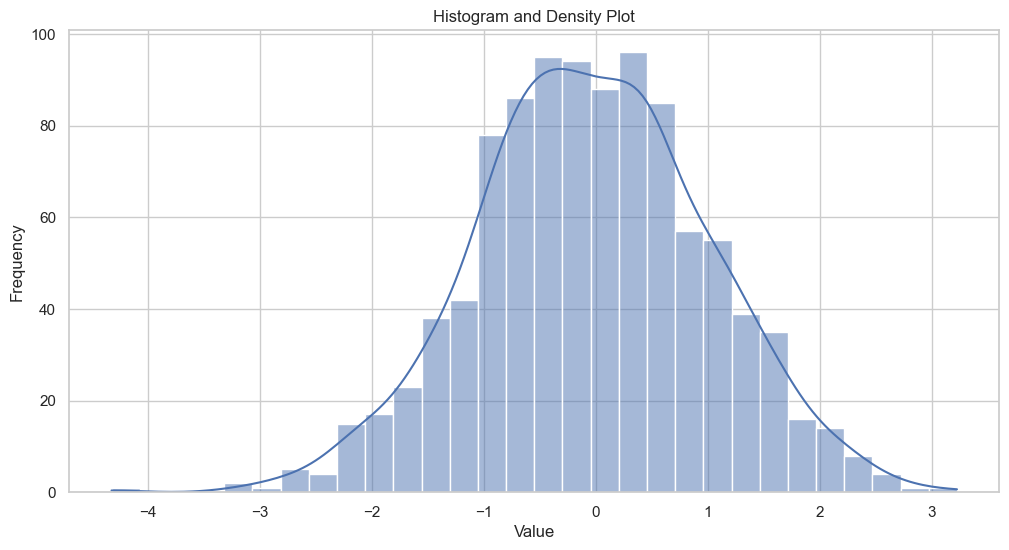

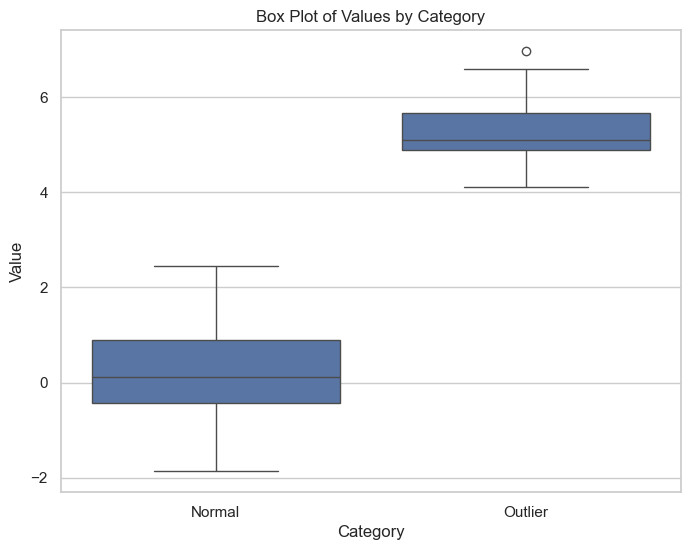

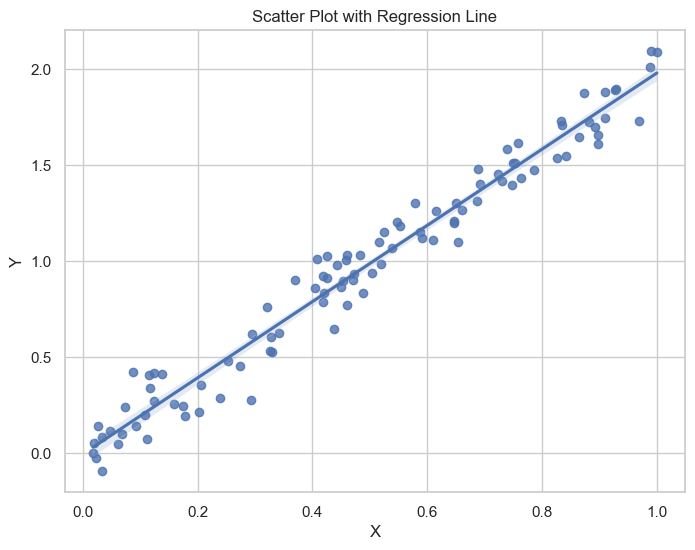

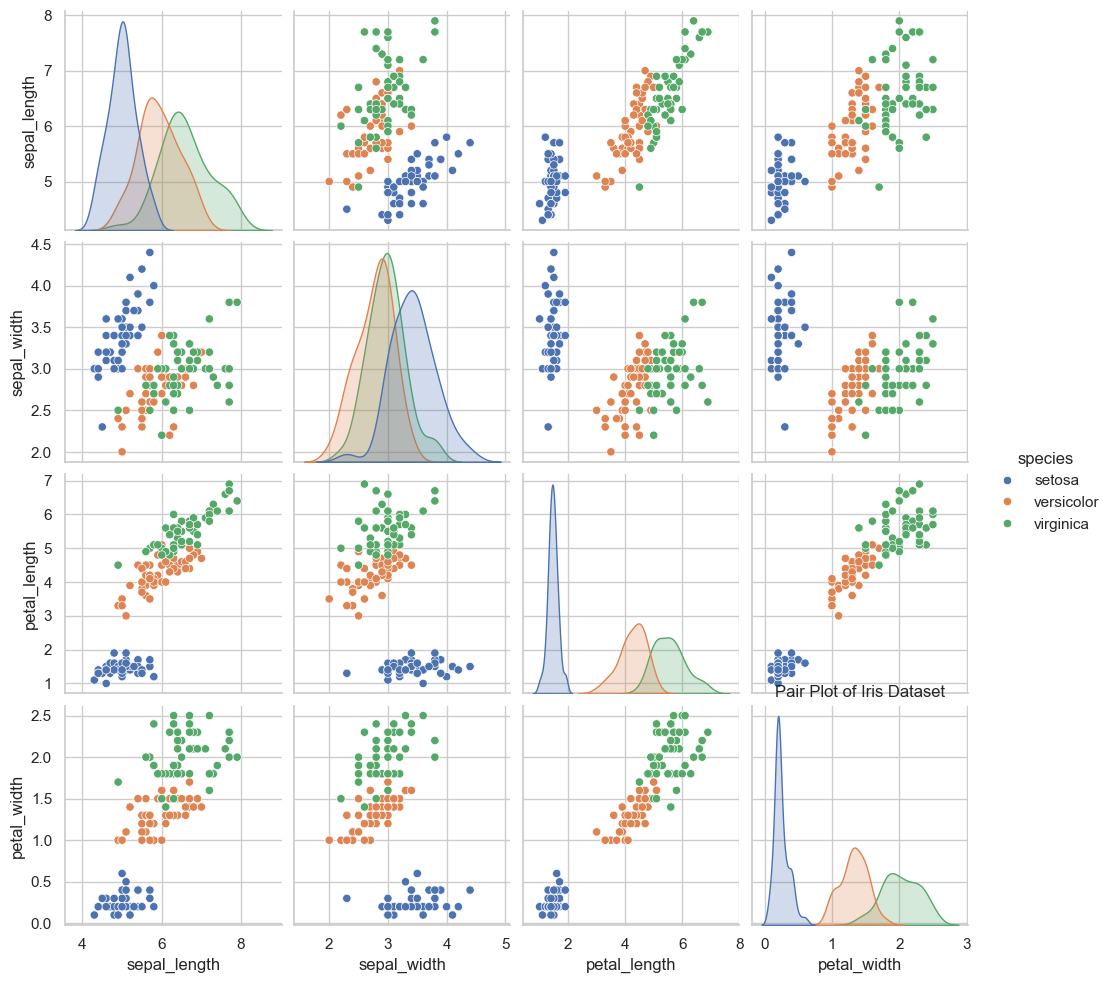

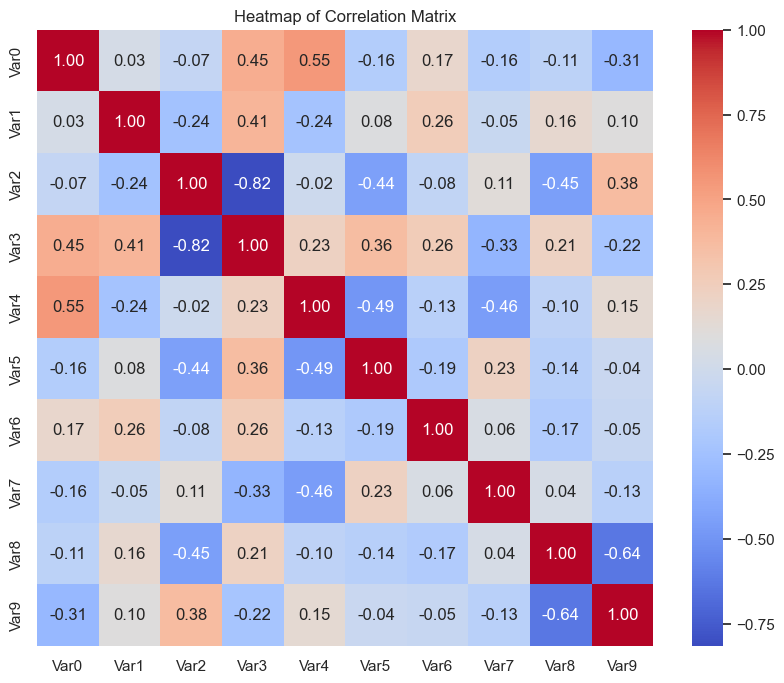

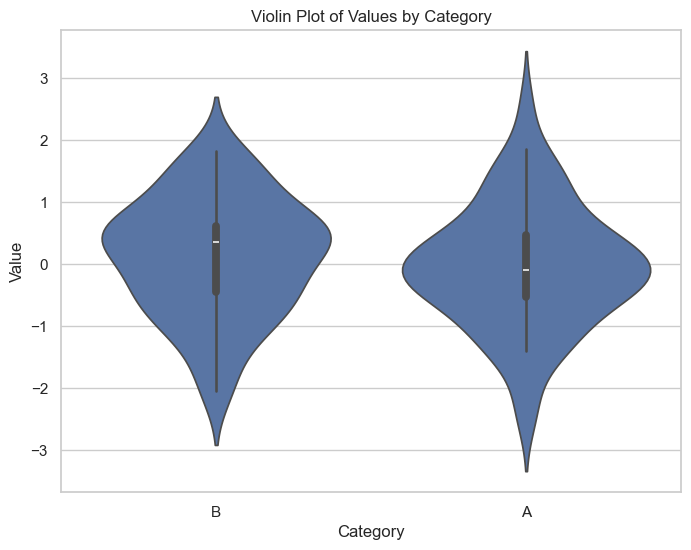

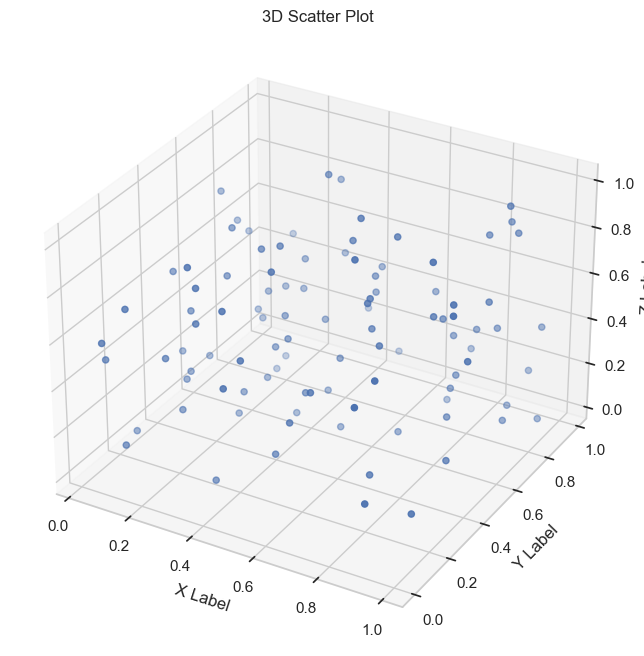

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# 1. Histogram and Density Plot
data = np.random.normal(loc=0, scale=1, size=1000)
df_hist = pd.DataFrame(data, columns=['Value'])

plt.figure(figsize=(12, 6))
sns.histplot(df_hist['Value'], bins=30, kde=True)
plt.title('Histogram and Density Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot
data = np.random.normal(loc=0, scale=1, size=100)
outliers = np.random.normal(loc=5, scale=1, size=10)
df_box = pd.DataFrame({'Value': np.concatenate([data, outliers]), 'Category': ['Normal'] * 100 + ['Outlier'] * 10})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Value', data=df_box)
plt.title('Box Plot of Values by Category')
plt.show()

# 3. Scatter Plot with Regression Line
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)
df_scatter = pd.DataFrame({'X': x, 'Y': y})

plt.figure(figsize=(8, 6))
sns.regplot(x='X', y='Y', data=df_scatter)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 4. Pair Plot
iris = sns.load_dataset('iris')

sns.pairplot(iris, hue='species')
plt.title('Pair Plot of Iris Dataset')
plt.show()

# 5. Heatmap of Correlation Matrix
data = np.random.rand(10, 10)
df_heatmap = pd.DataFrame(data, columns=[f'Var{i}' for i in range(10)])

# Correlation matrix
corr = df_heatmap.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# 6. Violin Plot
data = np.random.normal(loc=0, scale=1, size=100)
df_violin = pd.DataFrame({'Value': data, 'Category': np.random.choice(['A', 'B'], size=100)})

plt.figure(figsize=(8, 6))
sns.violinplot(x='Category', y='Value', data=df_violin)
plt.title('Violin Plot of Values by Category')
plt.show()

# 7. 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Scatter Plot')
plt.show()

